In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv("Meteorite Landings.csv")
df.head()


,Name,ID,NameType,Classification,Mass,Fall,Year,Coordinates
0,Aachen,1,Valid,L5,"Quantity[21, ""Grams""]",Fell,"DateObject[{1880}, ""Year"", ""Gregorian"", -5.]","GeoPosition[{50.775, 6.08333}]"
1,Aarhus,2,Valid,H6,"Quantity[720, ""Grams""]",Fell,"DateObject[{1951}, ""Year"", ""Gregorian"", -5.]","GeoPosition[{56.18333, 10.23333}]"
2,Abee,6,Valid,EH4,"Quantity[107000, ""Grams""]",Fell,"DateObject[{1952}, ""Year"", ""Gregorian"", -5.]","GeoPosition[{54.21667, -113.}]"
3,Acapulco,10,Valid,Acapulcoite,"Quantity[1914, ""Grams""]",Fell,"DateObject[{1976}, ""Year"", ""Gregorian"", -5.]","GeoPosition[{16.88333, -99.9}]"
4,Achiras,370,Valid,L6,"Quantity[780, ""Grams""]",Fell,"DateObject[{1902}, ""Year"", ""Gregorian"", -5.]","GeoPosition[{-33.16667, -64.95}]"


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            45716 non-null  object
 1   ID              45716 non-null  int64 
 2   NameType        45716 non-null  object
 3   Classification  45716 non-null  object
 4   Mass            45716 non-null  object
 5   Fall            45716 non-null  object
 6   Year            45716 non-null  object
 7   Coordinates     45716 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.8+ MB


In [9]:
df.describe

<bound method NDFrame.describe of              Name     ID NameType        Classification  \
0          Aachen      1    Valid                    L5   
1          Aarhus      2    Valid                    H6   
2            Abee      6    Valid                   EH4   
3        Acapulco     10    Valid           Acapulcoite   
4         Achiras    370    Valid                    L6   
...           ...    ...      ...                   ...   
45711  Zillah 002  31356    Valid               Eucrite   
45712      Zinder  30409    Valid  Pallasite, ungrouped   
45713        Zlin  30410    Valid                    H4   
45714   Zubkovsky  31357    Valid                    L6   
45715  Zulu Queen  30414    Valid                  L3.7   

                            Mass   Fall  \
0          Quantity[21, "Grams"]   Fell   
1         Quantity[720, "Grams"]   Fell   
2      Quantity[107000, "Grams"]   Fell   
3        Quantity[1914, "Grams"]   Fell   
4         Quantity[780, "Grams"]   Fell   

In [10]:
df.isnull()


,Name,ID,NameType,Classification,Mass,Fall,Year,Coordinates
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
45711,False,False,False,False,False,False,False,False
45712,False,False,False,False,False,False,False,False
45713,False,False,False,False,False,False,False,False
45714,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()


Name              0
ID                0
NameType          0
Classification    0
Mass              0
Fall              0
Year              0
Coordinates       0
dtype: int64

In [12]:
df.columns = df.columns.str.strip()  
df.columns = df.columns.str.lower()  
print(df.columns.tolist())


['name', 'id', 'nametype', 'classification', 'mass', 'fall', 'year', 'coordinates']


In [13]:
df = df.dropna(subset=["mass", "year", "coordinates"])


In [14]:
print("\nDescriptive Statistics:")
print("="*50)
# Flexible column detection
masscol = None
latcol = None
longcol = None
yearcol = None

for col in df.columns:
    if 'mass' in col.lower():
        masscol = col
    elif 'lat' in col.lower() or 'latitude' in col.lower():
        latcol = col
    elif 'long' in col.lower() or 'longitude' in col.lower():
        longcol = col
    elif 'year' in col.lower():
        yearcol = col



Descriptive Statistics:


In [15]:
# from Quantity[123, "Gr"] we take just mass value so numerical 
import re

def mass_number(mass_str):
    if pd.isnull(mass_str):
        return None
    result = re.findall(r"\d+\.*\d*", str(mass_str))
    return float(result[0]) if result else None

df['mass_g'] = df['mass'].apply(mass_number)


In [16]:
def year_number(year_str):
    if pd.isnull(year_str):
        return None
    result=re.findall(r"\d{4}",str(year_str)) #returns 4 digits of year like 1998
    return int(result[0]) if result else None
df['year_clean'] = df['year'].apply(year_number)

In [18]:
# taking column that looks like 'geoposition[{53.2, 22.5}]'
def get_lat(coord):
    if pd.isnull(coord):
        return None
    result = re.findall(r"\{([-\d.]+),", str(coord))
    return float(result[0]) if result else None

def get_long(coord):
    if pd.isnull(coord):
        return None
    result = re.findall(r", ([-\d.]+)\}", str(coord))
    return float(result[0]) if result else None

df['lat'] = df['coordinates'].apply(get_lat)
df['long'] = df['coordinates'].apply(get_long)

# null values removal and making sure values are correct 
df = df.dropna(subset=['mass_g', 'year_clean', 'lat', 'long'])
df = df[(df['mass_g'] > 0) & (df['lat'].between(-90, 90)) & (df['long'].between(-180, 180))]


In [21]:
#  meteorites thate 'Fell' versus 'Found' 
fellvsfound = df['fall'].value_counts()
print("Fell vs Found counts:\n", fellvsfound)

Fell vs Found counts:
 fall
Found    30847
Fell      1063
Name: count, dtype: int64


In [34]:
avgmass1= df['classification'].value_counts().head().index
for cls in avgmass1:
     avgmass = df[df['classification'] == cls]['mass_g'].mean()
     print(f"{cls:} {avgmass:.1f} grams")

L6 1708.5 grams
H5 2563.6 grams
H4 1098.1 grams
H6 1112.7 grams
L5 2832.2 grams


In [55]:
#adding col Time-Based Analysis
df['year_numeric'] = df['year'].str.extract(r'\[{(\d+)}').astype(float)
# sortdate column using the extracted numeric year
df['sortdate'] = (df['year_numeric'].astype(int) // 10) * 10
# counts nd sort 
decadecounts = df['sortdate'].value_counts().sort_index()
print("Discoveries per decade:\n", decadecounts)

Discoveries per decade:
 sortdate
1390       1
1490       2
1570       1
1580       1
1600       1
1620       3
1630       2
1660       1
1670       1
1680       1
1710       2
1720       2
1740       3
1750       3
1760       3
1770       3
1780       5
1790      11
1800      21
1810      30
1820      28
1830      33
1840      47
1850      71
1860      95
1870      88
1880     121
1890     125
1900     136
1910     151
1920     157
1930     298
1940     188
1950     201
1960     375
1970    4954
1980    6801
1990    9061
2000    8060
2010     823
Name: count, dtype: int64


In [45]:
massss = df['mass_g'] / 1000
print(f"mean: {massss.mean():.2f} kg")
print(f"median: {massss.median():.2f} kg")
print(f"std dev: {massss.std():.2f} kg")
print(f"Sum: {massss.sum():.2f} kg")
print(f"max: {massss.max():.2f} kg")


Mean: 18.55 kg
Median: 0.03 kg
Std dev: 687.05 kg
Sum: 592055.32 kg
Max: 60000.00 kg


In [46]:
df.head



<bound method NDFrame.head of              name     id nametype        classification  \
0          Aachen      1    Valid                    L5   
1          Aarhus      2    Valid                    H6   
2            Abee      6    Valid                   EH4   
3        Acapulco     10    Valid           Acapulcoite   
4         Achiras    370    Valid                    L6   
...           ...    ...      ...                   ...   
45711  Zillah 002  31356    Valid               Eucrite   
45712      Zinder  30409    Valid  Pallasite, ungrouped   
45713        Zlin  30410    Valid                    H4   
45714   Zubkovsky  31357    Valid                    L6   
45715  Zulu Queen  30414    Valid                  L3.7   

                            mass   fall  \
0          Quantity[21, "Grams"]   Fell   
1         Quantity[720, "Grams"]   Fell   
2      Quantity[107000, "Grams"]   Fell   
3        Quantity[1914, "Grams"]   Fell   
4         Quantity[780, "Grams"]   Fell   
...

In [47]:
import matplotlib.pyplot as plt


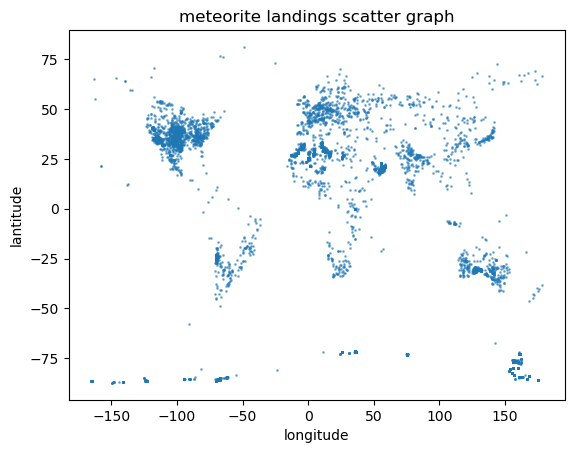

In [63]:
# 4. Scatter plot: Lat/long of landing locations
plt.scatter(df['long'], df['lat'], s=1, alpha=0.5)
plt.title('meteorite landings scatter graph')
plt.xlabel('longitude')
plt.ylabel('lantitude')
plt.show()


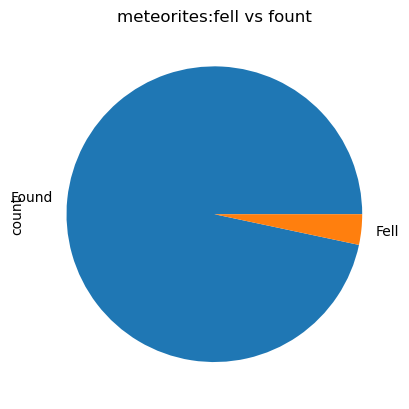

In [49]:
#fell vs found
df['fall'].value_counts().plot(kind='pie')
plt.title('meteorites:fell vs fount')
plt.show()

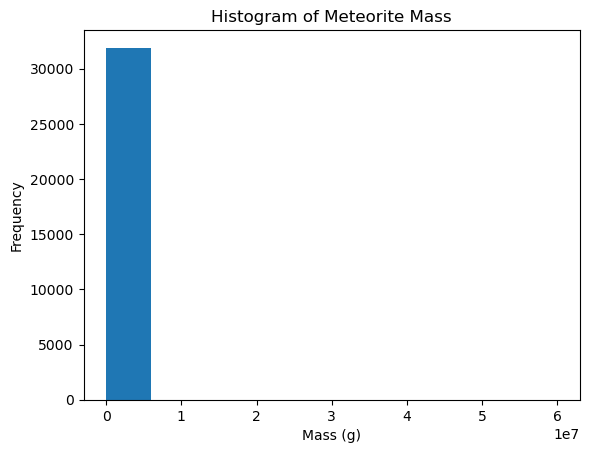

In [53]:
plt.hist(df['mass_g'], bins=10)
plt.title("Histogram of Meteorite Mass")
plt.xlabel("Mass (g)")
plt.ylabel("Frequency")
plt.show()

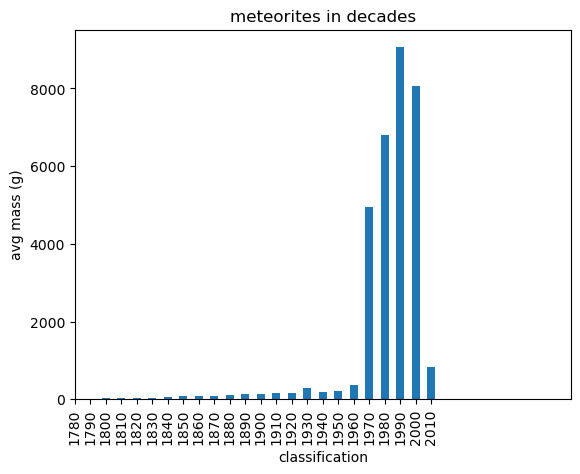

In [60]:
decadecounts.plot(kind='bar')
plt.title("meteorites in decades")
plt.xlabel("classification")
plt.xlim(16, 48)
plt.ylabel('avg mass (g)')
plt.show()

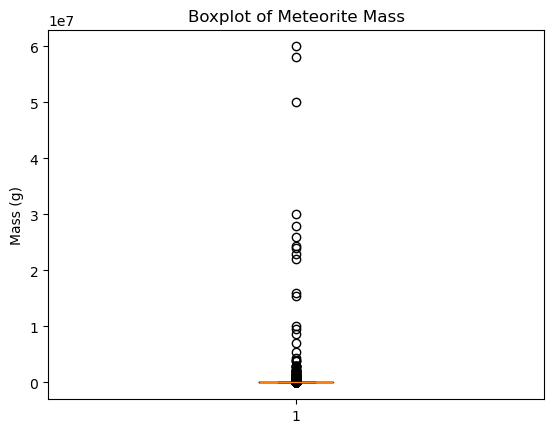

In [62]:
plt.boxplot(df['mass_g'])
plt.title("Boxplot of Meteorite Mass")
plt.ylabel("Mass (g)")
plt.show()
